In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


train = pd.read_csv ('../input/titanic/train.csv')
gender= pd.read_csv('../input/titanic/gender_submission.csv')
test= pd.read_csv('../input/titanic/test.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train.head()

In [ ]:
train.isnull()

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

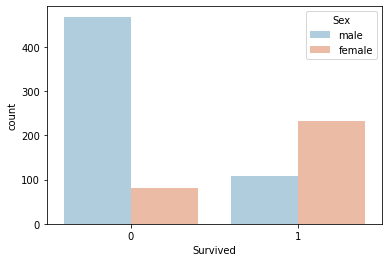

In [28]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

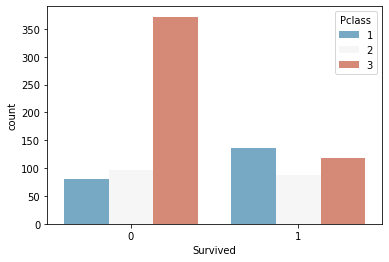

In [25]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [ ]:
train['Age'].plot.hist()

In [ ]:
train.info()

In [ ]:
sns.countplot(x='SibSp',data=train)

In [ ]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [ ]:
import cufflinks as cf
cf.go_offline()

In [ ]:
train['Fare'].iplot(kind='hist',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

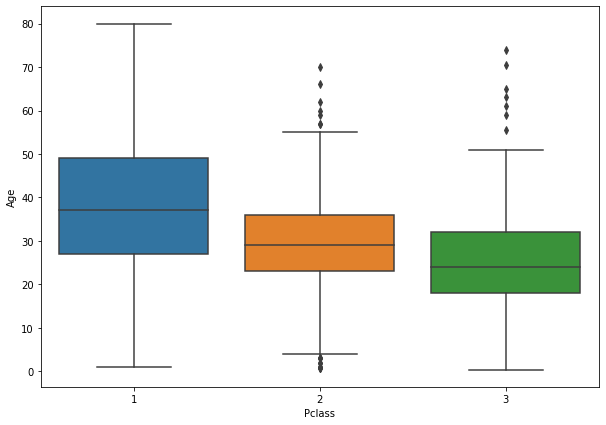

In [24]:
plt.figure(figsize=[10,7])
sns.boxplot(x='Pclass',y='Age',data=train)

In [ ]:
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        
        return Age
    
            

In [ ]:
train['Age']= train[['Age','Pclass']].apply(imput_age,axis=1)

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
pd.get_dummies(train['Sex'])

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [ ]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
train.drop('PassengerId',axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
X=train.drop('Survived',axis=1)
Y=train['Survived']